## Density-Based Parameters 

### Coordinates
-- plots Density Based Coordinates
-- verifies there are neighbors within 4km squared {how many neighbors?}


In [1]:
%matplotlib inline
from shapely.geometry import Polygon, LineString
import os
import pandas as pd
import geopandas as gpd
#import matplotlib.pyplot as plt;
import shapely
import pandas as pd
import geopandas
from shapely.geometry import Point
from geopy import distance
import mplleaflet
import matplotlib.pyplot as plt;
import math

# Input File is set by the data_file_path coordinates 

In [2]:
annoted_test_path = "/Users/luciaeve/Documents/EMSE/KAISERSLAUTERN/THESIS/code/CompiledCode/SCOPE_MODEL/input_files/UC1_Testset_Germany/contextInfo.csv"
exists = os.path.isfile(annoted_test_path)
if exists:
    # Store configuration file values
    print("File exists")
    data_set = pd.read_csv(annoted_test_path)
    data_set['Coordinates_Joined'] = list(zip(data_set.LONGITUDE, data_set.LATITUDE))

File exists


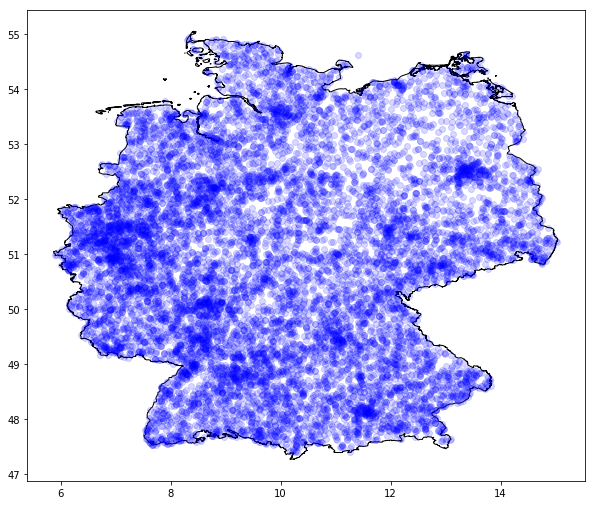

In [4]:
def plot_coordinates(show_map=False):
    data_set['Coordinates_Joined'] = list(zip(data_set.LONGITUDE, data_set.LATITUDE))
    
    gdf = geopandas.GeoDataFrame(data_set, geometry=data_set['Coordinates_Joined'].apply(Point))
    germany_plot = gpd.read_file("shp/Germanyboundary87.shp")
    ax = germany_plot.plot(
        color='white', edgecolor='black', figsize=(10, 10))
    gdf.plot(ax=ax, color='blue',alpha=0.15)
    if show_map: 
         mplleaflet.show(fig = ax.figure)
plot_coordinates()

[15.0419319, 5.8663153]
[55.0586617, 47.2701114]
12630


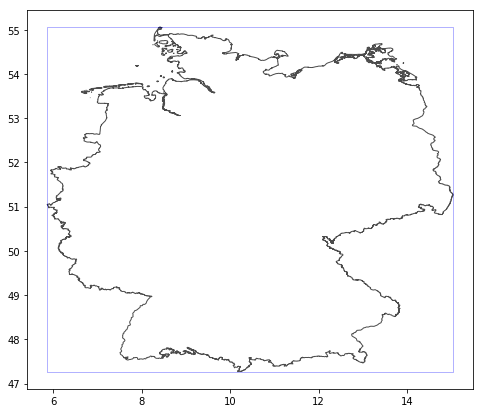

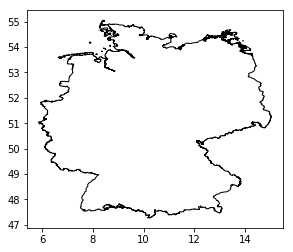

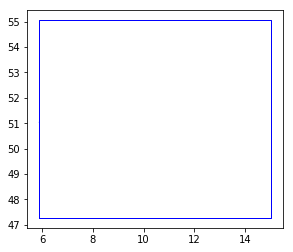

In [7]:
germany_plot = gpd.read_file("shp/Germanyboundary87.shp")
def generate_boundaries():
    
    hulls = germany_plot["geometry"].convex_hull
    bounds = germany_plot.bounds['maxx']
    envelope = geopandas.GeoSeries(hulls.envelope)
    x_values = [float(germany_plot.bounds['maxx']), float(germany_plot.bounds['minx'])]
    y_values = [float(germany_plot.bounds['maxy']), float(germany_plot.bounds['miny'])]
    return x_values, y_values, envelope


boundaries = generate_boundaries()
x_boundaries = boundaries[0]
y_boundaries = boundaries[1]
envelope = boundaries[2]
print(x_boundaries)
print(y_boundaries)

count = 0 
for value in sorted(data_set.LONGITUDE):
    #print(value)
    if value < x_boundaries[0]:
        count = count+1 

print(count)


data_set['Coordinates_Joined'] = list(zip(data_set.LONGITUDE, data_set.LATITUDE))
gdf = geopandas.GeoDataFrame(data_set, geometry=envelope)
ax = germany_plot.plot(
        color='white', edgecolor='black', figsize=(8, 8))
gdf.plot(ax=ax, color='white',alpha=0.3, edgecolor="blue")

germany_plot.plot(color="white", edgecolor="black")

## these are the parameters

envelope.plot(ax=germany_plot.plot(), color="white", edgecolor="blue")
plt.show()

[15.0419319, 5.8663153]
[55.0586617, 47.2701114]
1.0000000000000018


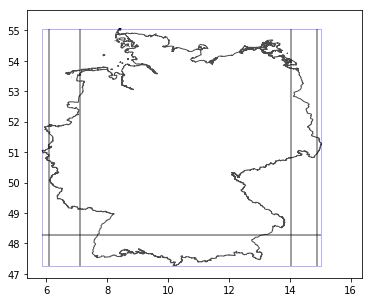

In [8]:
from shapely.geometry import Polygon, LineString


def generate_boundaries():
    germany_plot = gpd.read_file("shp/Germanyboundary87.shp")
    hulls = germany_plot["geometry"].convex_hull
    bounds = germany_plot.bounds['maxx']
    envelope = geopandas.GeoSeries(hulls.envelope)
    x_values = [float(germany_plot.bounds['maxx']), float(germany_plot.bounds['minx'])]
    y_values = [float(germany_plot.bounds['maxy']), float(germany_plot.bounds['miny'])]
    return x_values, y_values


boundaries = generate_boundaries()
x_boundaries = boundaries[0]
y_boundaries = boundaries[1]
print(x_boundaries)
print(y_boundaries)
a = x_boundaries
b= [16.0419319, 5.8663153]


dis = math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
print(dis)


## [Polygon([(x,x), (2,0), (2,2), (0,2)])
polys2 = geopandas.GeoSeries([LineString([[6.09663153, 47.2701114], [6.0966315, 55.0586617]]), LineString([[7.0966315, 47.2701114], [7.0966315, 55.0586617]]),
                             LineString([[14.0419319, 47.2701114], [14.0419319, 55.0586617]]), 
                             LineString([[14.9, 47.2701114], [14.9, 55.0586617]])])

polys3 = geopandas.GeoSeries([LineString([[5.8663153, 48.2701114], [15.0419319, 48.2701114]]),
                              LineString([[15.8663153, 55.2701114], [15.8663153, 55.2701114]])
                             ])




df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1, 2, 3, 4]})
df3 = geopandas.GeoDataFrame({'geometry': polys3, 'df3':[1,2]})

gdf = geopandas.GeoDataFrame(data_set, geometry=envelope)
ax = germany_plot.plot(
        color='white', edgecolor='black', figsize=(6, 6))
gdf.plot(ax=ax, color='white',alpha=0.3, edgecolor="blue")
df2.plot(ax=ax, color='black', alpha=0.5)
df3.plot(ax=ax, color='black', alpha=0.5)



In [9]:
## HAVERSINE & KD TREE
# @todo: fix strategy
import numpy as np
from scipy.spatial import cKDTree

tree = cKDTree(list(data_set['Coordinates_Joined']))
dist = 4
for x in data_set['Coordinates_Joined']:
    ix = tree.query_ball_point(x, dist)
    if len(ix) < 1:
        print("No points")
    else: 
        print(str(x)+ "Has" + str(len(ix)) + "Neighbors")


def find_neighbours_within_radius(xy, radius):
    tree = cKDTree(xy)
    within_radius = tree.query_ball_tree(tree, r=radius)
    return within_radius

def flatten_nested_list(nested_list):
    return [item for sublist in nested_list for item in sublist]

def total_neighbours_within_radius(xy, radius):
    neighbours = find_neighbours_within_radius(xy, radius)
    return len(flatten_nested_list(neighbours))

(8.0, 50.83)Has9082Neighbors
(9.01, 52.51)Has9056Neighbors
(8.07, 49.72)Has8792Neighbors
(7.6, 52.25)Has7470Neighbors
(7.33, 52.41)Has6941Neighbors
(9.49, 52.64)Has9300Neighbors
(7.72, 51.77)Has8178Neighbors
(7.58, 53.63)Has5717Neighbors
(10.56, 52.17)Has10201Neighbors
(11.81, 49.61)Has8150Neighbors
(11.97, 48.77)Has6881Neighbors
(9.96, 48.82)Has8856Neighbors
(12.07, 51.85)Has8078Neighbors
(12.44, 51.12)Has7821Neighbors
(9.07, 49.4)Has9728Neighbors
(10.63, 50.13)Has10851Neighbors
(11.88, 49.54)Has7950Neighbors
(9.15, 54.6)Has4584Neighbors
(6.74, 50.78)Has6908Neighbors
(11.93, 51.13)Has8999Neighbors
(9.66, 53.75)Has6720Neighbors
(10.53, 52.25)Has10044Neighbors
(13.23, 51.35)Has6079Neighbors
(12.5, 50.72)Has7712Neighbors
(10.0, 53.55)Has7233Neighbors
(9.76, 49.6)Has10375Neighbors
(9.08, 48.62)Has8570Neighbors
(13.51, 52.37)Has4861Neighbors
(8.52, 49.9)Has9644Neighbors
(9.4, 48.4)Has8120Neighbors
(11.54, 49.07)Has7789Neighbors
(14.01, 53.12)Has3399Neighbors
(7.45, 52.76)Has6703Neighbors
(

(8.81, 51.33)Has10263Neighbors
(12.63, 49.23)Has6423Neighbors
(8.31, 51.87)Has9004Neighbors
(10.9, 48.87)Has8036Neighbors
(11.52, 49.76)Has8829Neighbors
(7.54, 52.5)Has7086Neighbors
(8.85, 50.07)Has10213Neighbors
(10.33, 51.66)Has11245Neighbors
(10.71, 53.99)Has5898Neighbors
(9.05, 53.67)Has6623Neighbors
(8.69, 50.02)Has9949Neighbors
(10.98, 48.21)Has6771Neighbors
(9.85, 48.81)Has8912Neighbors
(13.9, 51.11)Has5002Neighbors
(9.19, 50.26)Has10677Neighbors
(9.47, 52.33)Has9818Neighbors
(10.1, 50.95)Has11882Neighbors
(7.77, 50.93)Has8681Neighbors
(12.31, 49.61)Has7340Neighbors
(6.57, 51.86)Has6227Neighbors
(13.51, 51.08)Has5579Neighbors
(7.17, 52.24)Has6904Neighbors
(13.24, 53.35)Has4210Neighbors
(9.67, 49.2)Has9709Neighbors
(7.71, 49.09)Has7636Neighbors
(10.22, 49.37)Has9719Neighbors
(10.15, 50.3)Has11440Neighbors
(9.93, 53.6)Has7127Neighbors
(11.85, 52.01)Has8291Neighbors
(7.1, 49.39)Has7037Neighbors
(10.07, 53.19)Has8158Neighbors
(12.15, 50.43)Has8461Neighbors
(13.03, 52.75)Has5168Neigh

(13.12, 51.78)Has6016Neighbors
(7.16, 52.1)Has7060Neighbors
(13.39, 52.31)Has5104Neighbors
(11.91, 52.73)Has6876Neighbors
(10.3, 53.84)Has6331Neighbors
(7.98, 52.64)Has7476Neighbors
(9.17, 48.97)Has9201Neighbors
(12.11, 50.74)Has8651Neighbors
(7.81, 50.8)Has8726Neighbors
(9.24, 53.59)Has6886Neighbors
(13.17, 52.9)Has4711Neighbors
(11.52, 53.34)Has6441Neighbors
(8.73, 49.33)Has9290Neighbors
(8.49, 51.39)Has9777Neighbors
(9.95, 53.06)Has8534Neighbors
(13.74, 52.74)Has4083Neighbors
(9.68, 52.4)Has9846Neighbors
(13.24, 52.44)Has5202Neighbors
(6.82, 51.61)Has6883Neighbors
(10.0, 47.55)Has6136Neighbors
(8.65, 49.59)Has9506Neighbors
(11.38, 48.79)Has7455Neighbors
(8.21, 51.61)Has9157Neighbors
(11.85, 52.38)Has7569Neighbors
(11.4, 53.81)Has5824Neighbors
(9.68, 48.46)Has8222Neighbors
(6.63, 51.87)Has6330Neighbors
(6.93, 52.15)Has6646Neighbors
(9.25, 51.34)Has10837Neighbors
(7.62, 48.16)Has6420Neighbors
(10.63, 49.47)Has9484Neighbors
(13.83, 51.17)Has5091Neighbors
(9.73, 47.76)Has6587Neighbors
(

(9.11, 51.28)Has10682Neighbors
(12.64, 48.99)Has6198Neighbors
(10.69, 49.98)Has10537Neighbors
(12.18, 51.57)Has8158Neighbors
(12.32, 51.34)Has7995Neighbors
(12.49, 50.72)Has7737Neighbors
(11.46, 51.79)Has9487Neighbors
(12.2, 49.38)Has7330Neighbors
(12.32, 47.8)Has4956Neighbors
(7.61, 51.27)Has8384Neighbors
(12.44, 50.49)Has7823Neighbors
(10.84, 53.63)Has6570Neighbors
(12.27, 52.41)Has6792Neighbors
(11.67, 47.62)Has5458Neighbors
(8.6, 52.07)Has9143Neighbors
(10.21, 52.4)Has9890Neighbors
(6.17, 51.66)Has5569Neighbors
(8.82, 48.0)Has7146Neighbors
(11.34, 48.0)Has6296Neighbors
(13.03, 51.38)Has6417Neighbors
(11.05, 51.47)Has10829Neighbors
(11.51, 49.33)Has8229Neighbors
(9.56, 50.95)Has11326Neighbors
(10.92, 51.0)Has11236Neighbors
(12.81, 47.94)Has4662Neighbors
(9.73, 48.74)Has8840Neighbors
(9.44, 49.52)Has10126Neighbors
(9.56, 53.29)Has7807Neighbors
(9.38, 48.5)Has8387Neighbors
(13.35, 50.91)Has5887Neighbors
(11.84, 51.66)Has8855Neighbors
(9.91, 51.36)Has11555Neighbors
(8.93, 52.29)Has9280

(9.92, 54.73)Has4420Neighbors
(10.11, 50.71)Has11828Neighbors
(6.68, 51.23)Has6760Neighbors
(13.55, 48.78)Has4716Neighbors
(12.44, 54.2)Has4357Neighbors
(9.82, 49.01)Has9282Neighbors
(11.06, 49.72)Has9481Neighbors
(11.3, 53.27)Has6813Neighbors
(12.51, 48.19)Has5290Neighbors
(7.27, 53.06)Has6233Neighbors
(11.85, 50.87)Has9233Neighbors
(6.61, 51.07)Has6668Neighbors
(11.29, 49.96)Has9523Neighbors
(8.93, 50.83)Has10608Neighbors
(11.84, 48.15)Has6133Neighbors
(10.42, 49.3)Has9368Neighbors
(10.0, 53.32)Has7852Neighbors
(7.04, 50.86)Has7418Neighbors
(13.47, 52.6)Has4665Neighbors
(10.42, 50.31)Has11338Neighbors
(8.48, 48.37)Has7697Neighbors
(7.01, 50.96)Has7361Neighbors
(7.83, 49.34)Has8100Neighbors
(9.3, 49.21)Has9651Neighbors
(8.93, 52.46)Has9041Neighbors
(9.31, 51.12)Has11025Neighbors
(13.61, 53.39)Has3743Neighbors
(12.38, 49.9)Has7456Neighbors
(8.8, 49.97)Has10079Neighbors
(8.64, 52.36)Has8837Neighbors
(10.32, 47.83)Has6508Neighbors
(8.61, 52.42)Has8723Neighbors
(8.92, 49.6)Has9836Neighbor

(11.92, 48.57)Has6639Neighbors
(11.62, 49.41)Has8179Neighbors
(8.57, 51.56)Has9739Neighbors
(11.28, 49.98)Has9567Neighbors
(12.1, 48.57)Has6434Neighbors
(7.82, 48.14)Has6589Neighbors
(9.88, 48.61)Has8529Neighbors
(8.53, 52.67)Has8212Neighbors
(12.37, 48.58)Has6054Neighbors
(8.01, 50.86)Has9104Neighbors
(8.5, 51.39)Has9793Neighbors
(11.61, 51.44)Has9561Neighbors
(12.07, 47.82)Has5326Neighbors
(11.85, 48.76)Has6974Neighbors
(9.97, 52.14)Has10378Neighbors
(8.98, 54.7)Has4412Neighbors
(10.05, 53.15)Has8281Neighbors
(8.51, 52.17)Has8893Neighbors
(7.45, 53.13)Has6342Neighbors
(12.35, 48.44)Has5843Neighbors
(7.8, 53.69)Has5776Neighbors
(11.02, 49.33)Has8766Neighbors
(9.33, 54.57)Has4670Neighbors
(9.74, 48.79)Has8914Neighbors
(7.15, 49.47)Has7193Neighbors
(10.91, 52.28)Has9490Neighbors
(12.09, 53.73)Has5299Neighbors
(9.73, 52.39)Has9897Neighbors
(6.69, 49.8)Has6700Neighbors
(9.74, 49.05)Has9410Neighbors
(13.53, 52.39)Has4814Neighbors
(8.87, 53.08)Has7745Neighbors
(10.59, 52.41)Has9631Neighbors

(11.12, 50.46)Has10483Neighbors
(7.69, 50.41)Has8463Neighbors
(12.88, 50.79)Has6832Neighbors
(11.61, 48.9)Has7431Neighbors
(6.65, 49.41)Has6304Neighbors
(13.2, 54.14)Has3668Neighbors
(10.39, 47.84)Has6504Neighbors
(10.7, 51.4)Has11478Neighbors
(9.65, 54.36)Has5154Neighbors
(11.0, 50.4)Has10617Neighbors
(13.65, 52.55)Has4422Neighbors
(6.58, 51.64)Has6403Neighbors
(10.53, 48.61)Has7948Neighbors
(10.2, 50.32)Has11447Neighbors
(7.62, 51.13)Has8442Neighbors
(11.82, 50.16)Has8904Neighbors
(8.47, 50.92)Has9930Neighbors
(13.47, 51.33)Has5630Neighbors
(8.11, 48.63)Has7635Neighbors
(8.12, 47.69)Has6021Neighbors
(9.36, 54.4)Has5053Neighbors
(9.26, 48.76)Has8895Neighbors
(9.22, 51.62)Has10508Neighbors
(11.75, 48.62)Has6871Neighbors
(11.17, 48.9)Has7796Neighbors
(9.42, 52.44)Has9585Neighbors
(12.95, 47.84)Has4425Neighbors
(11.81, 50.14)Has8895Neighbors
(12.45, 53.16)Has5539Neighbors
(13.39, 54.4)Has3290Neighbors
(8.06, 48.25)Has7007Neighbors
(12.31, 51.08)Has8167Neighbors
(9.9, 50.62)Has11613Neighb

(9.61, 52.41)Has9794Neighbors
(11.42, 49.99)Has9356Neighbors
(12.18, 48.54)Has6273Neighbors
(12.16, 49.31)Has7316Neighbors
(10.11, 48.38)Has7758Neighbors
(13.81, 52.95)Has3799Neighbors
(12.24, 50.6)Has8341Neighbors
(7.87, 51.03)Has8891Neighbors
(9.85, 51.98)Has10635Neighbors
(13.23, 51.81)Has5783Neighbors
(9.68, 48.9)Has9157Neighbors
(8.55, 51.71)Has9517Neighbors
(6.21, 50.82)Has6067Neighbors
(13.55, 52.55)Has4612Neighbors
(9.21, 48.49)Has8357Neighbors
(10.2, 49.02)Has9049Neighbors
(12.19, 47.65)Has4854Neighbors
(11.15, 51.72)Has10261Neighbors
(13.45, 52.59)Has4698Neighbors
(7.61, 53.45)Has5967Neighbors
(6.74, 50.91)Has6893Neighbors
(9.57, 51.24)Has11286Neighbors
(11.03, 50.08)Has10110Neighbors
(7.97, 50.48)Has8939Neighbors
(8.31, 53.38)Has6697Neighbors
(8.09, 47.63)Has5856Neighbors
(8.13, 51.93)Has8677Neighbors
(9.23, 54.44)Has4946Neighbors
(6.11, 51.02)Has5850Neighbors
(7.21, 49.66)Has7465Neighbors
(10.29, 54.25)Has5396Neighbors
(13.25, 51.27)Has6058Neighbors
(10.03, 49.47)Has10025Ne

(10.34, 50.36)Has11475Neighbors
(8.99, 49.59)Has9891Neighbors
(9.25, 47.82)Has6784Neighbors
(9.25, 54.55)Has4700Neighbors
(11.78, 51.2)Has9301Neighbors
(9.65, 51.77)Has10810Neighbors
(12.77, 48.09)Has4886Neighbors
(10.83, 48.07)Has6631Neighbors
(9.52, 48.82)Has9077Neighbors
(11.73, 47.7)Has5549Neighbors
(11.4, 52.83)Has7499Neighbors
(10.99, 49.95)Has10003Neighbors
(12.58, 54.41)Has4003Neighbors
(11.56, 48.14)Has6352Neighbors
(8.04, 52.0)Has8430Neighbors
(10.56, 52.97)Has8282Neighbors
(10.36, 52.98)Has8516Neighbors
(11.09, 49.65)Has9318Neighbors
(10.66, 47.91)Has6474Neighbors
(14.28, 52.72)Has3314Neighbors
(7.41, 53.35)Has5958Neighbors
(9.58, 53.3)Has7787Neighbors
(6.16, 50.75)Has5993Neighbors
(11.26, 47.4)Has5343Neighbors
(10.75, 54.25)Has5307Neighbors
(10.46, 51.63)Has11254Neighbors
(10.86, 49.82)Has9994Neighbors
(13.66, 52.53)Has4430Neighbors
(8.8, 52.22)Has9230Neighbors
(9.01, 48.91)Has8992Neighbors
(13.33, 48.41)Has4547Neighbors
(11.7, 53.87)Has5491Neighbors
(10.28, 48.09)Has7032Ne

(7.58, 50.94)Has8370Neighbors
(10.71, 48.12)Has6770Neighbors
(8.07, 51.76)Has8781Neighbors
(7.02, 50.26)Has7333Neighbors
(6.85, 51.79)Has6835Neighbors
(13.31, 52.54)Has4974Neighbors
(7.12, 49.86)Has7422Neighbors
(7.59, 51.04)Has8405Neighbors
(8.62, 50.51)Has10100Neighbors
(7.47, 50.77)Has8183Neighbors
(10.43, 49.17)Has9117Neighbors
(9.83, 49.49)Has10173Neighbors
(12.3, 49.57)Has7323Neighbors
(11.16, 53.49)Has6549Neighbors
(6.84, 51.49)Has6971Neighbors
(9.9, 49.22)Has9641Neighbors
(7.57, 50.16)Has8182Neighbors
(9.22, 51.78)Has10286Neighbors
(8.42, 49.35)Has8936Neighbors
(10.72, 50.93)Has11477Neighbors
(9.82, 49.8)Has10695Neighbors
(11.05, 48.4)Has7028Neighbors
(8.76, 50.33)Has10179Neighbors
(12.08, 52.12)Has7629Neighbors
(7.53, 51.91)Has7768Neighbors
(14.35, 51.15)Has4274Neighbors
(9.25, 51.47)Has10702Neighbors
(10.01, 53.45)Has7526Neighbors
(8.99, 49.2)Has9406Neighbors
(11.8, 51.76)Has8796Neighbors
(11.99, 52.12)Has7804Neighbors
(6.8, 49.87)Has6900Neighbors
(8.61, 50.1)Has9894Neighbors

(12.56, 54.44)Has3986Neighbors
(8.14, 51.91)Has8708Neighbors
(8.34, 52.03)Has8857Neighbors
(10.16, 52.69)Has9277Neighbors
(11.74, 52.02)Has8485Neighbors
(7.96, 51.91)Has8393Neighbors
(8.72, 48.09)Has7290Neighbors
(11.15, 49.68)Has9276Neighbors
(13.14, 50.9)Has6293Neighbors
(10.47, 49.45)Has9613Neighbors
(10.14, 50.49)Has11646Neighbors
(8.03, 49.83)Has8792Neighbors
(6.77, 50.85)Has6951Neighbors
(11.6, 48.03)Has6176Neighbors
(11.47, 53.5)Has6210Neighbors
(7.62, 51.37)Has8386Neighbors
(9.98, 47.98)Has6939Neighbors
(11.2, 49.08)Has8127Neighbors
(10.79, 47.72)Has6109Neighbors
(8.5, 52.06)Has9027Neighbors
(8.61, 48.46)Has7984Neighbors
(9.83, 52.3)Has10079Neighbors
(8.14, 50.84)Has9349Neighbors
(10.11, 51.76)Has11118Neighbors
(9.32, 48.86)Has9110Neighbors
(13.29, 52.47)Has5082Neighbors
(8.7, 53.48)Has6813Neighbors
(12.21, 53.23)Has5757Neighbors
(6.6, 51.69)Has6422Neighbors
(12.43, 48.64)Has6054Neighbors
(11.63, 50.64)Has9632Neighbors
(9.51, 48.67)Has8758Neighbors
(6.37, 50.62)Has6347Neighbors

(11.4, 51.18)Has10232Neighbors
(9.46, 51.63)Has10794Neighbors
(7.07, 52.4)Has6617Neighbors
(10.79, 52.15)Has9998Neighbors
(11.67, 51.76)Has9098Neighbors
(9.49, 50.68)Has11195Neighbors
(8.84, 50.13)Has10212Neighbors
(8.66, 49.7)Has9648Neighbors
(9.1, 54.17)Has5608Neighbors
(9.95, 54.71)Has4472Neighbors
(12.4, 51.01)Has7945Neighbors
(14.44, 51.17)Has4129Neighbors
(9.92, 49.18)Has9550Neighbors
(10.29, 47.68)Has6249Neighbors
(8.86, 50.23)Has10269Neighbors
(9.6, 48.26)Has7730Neighbors
(11.61, 49.97)Has9007Neighbors
(8.12, 49.91)Has8976Neighbors
(13.43, 53.11)Has4162Neighbors
(11.6, 53.39)Has6266Neighbors
(6.55, 50.78)Has6606Neighbors
(5.9, 50.99)Has5497Neighbors
(10.49, 50.76)Has11691Neighbors
(11.67, 52.18)Has8244Neighbors
(8.56, 48.93)Has8594Neighbors
(9.01, 50.66)Has10684Neighbors
(9.83, 50.42)Has11413Neighbors
(11.45, 50.64)Has10002Neighbors
(13.17, 51.25)Has6220Neighbors
(7.46, 53.24)Has6175Neighbors
(11.66, 54.14)Has5126Neighbors
(8.92, 53.22)Has7474Neighbors
(12.74, 48.95)Has6000Neig

(6.17, 50.87)Has6005Neighbors
(8.48, 47.87)Has6668Neighbors
(12.62, 48.37)Has5382Neighbors
(9.92, 52.39)Has9928Neighbors
(9.12, 48.17)Has7554Neighbors
(7.78, 51.98)Has8044Neighbors
(10.42, 50.56)Has11627Neighbors
(10.4, 53.12)Has8078Neighbors
(10.59, 53.48)Has7091Neighbors
(11.25, 47.78)Has5996Neighbors
(12.52, 48.21)Has5308Neighbors
(7.05, 51.03)Has7439Neighbors
(13.08, 52.64)Has5230Neighbors
(7.28, 51.48)Has7745Neighbors
(13.44, 52.42)Has4911Neighbors
(13.47, 52.63)Has4633Neighbors
(9.07, 50.09)Has10454Neighbors
(11.41, 48.19)Has6538Neighbors
(13.17, 52.68)Has5028Neighbors
(10.23, 53.52)Has7187Neighbors
(12.04, 48.52)Has6448Neighbors
(10.63, 48.7)Has8034Neighbors
(12.46, 51.33)Has7676Neighbors
(8.81, 52.74)Has8471Neighbors
(10.93, 49.15)Has8493Neighbors
(10.18, 47.93)Has6770Neighbors
(13.94, 52.25)Has4203Neighbors
(7.96, 49.82)Has8653Neighbors
(13.78, 51.68)Has4882Neighbors
(12.18, 53.31)Has5677Neighbors
(8.53, 48.91)Has8541Neighbors
(12.01, 51.8)Has8280Neighbors
(7.74, 51.34)Has8585

(11.27, 50.95)Has10487Neighbors
(9.25, 49.15)Has9541Neighbors
(10.55, 53.2)Has7759Neighbors
(13.98, 53.35)Has3299Neighbors
(7.16, 49.47)Has7210Neighbors
(12.78, 50.55)Has7010Neighbors
(13.79, 50.99)Has5204Neighbors
(12.48, 47.81)Has4821Neighbors
(12.55, 48.05)Has5078Neighbors
(7.53, 50.56)Has8237Neighbors
(10.07, 52.59)Has9557Neighbors
(8.47, 50.03)Has9640Neighbors
(11.11, 54.45)Has4837Neighbors
(8.95, 48.49)Has8263Neighbors
(12.38, 49.63)Has7231Neighbors
(13.24, 53.99)Has3729Neighbors
(11.82, 47.85)Has5694Neighbors
(6.93, 50.42)Has7219Neighbors
(12.75, 51.41)Has6948Neighbors
(9.2, 49.53)Has10005Neighbors
(7.72, 49.2)Has7778Neighbors
(10.6, 52.11)Has10294Neighbors
(7.94, 50.7)Has8936Neighbors
(8.73, 49.74)Has9773Neighbors
(10.76, 51.26)Has11519Neighbors
(11.3, 48.99)Has7854Neighbors
(8.58, 49.31)Has9118Neighbors
(8.56, 49.4)Has9176Neighbors
(9.8, 53.08)Has8473Neighbors
(8.75, 50.4)Has10203Neighbors
(6.95, 51.27)Has7236Neighbors
(10.31, 51.41)Has11625Neighbors
(10.5, 49.51)Has9699Neighb

(9.94, 51.63)Has11301Neighbors
(8.46, 49.97)Has9596Neighbors
(8.78, 50.01)Has10069Neighbors
(7.06, 51.07)Has7455Neighbors
(8.37, 49.44)Has8968Neighbors
(9.88, 53.61)Has7117Neighbors
(12.97, 52.61)Has5429Neighbors
(10.8, 53.25)Has7465Neighbors
(8.89, 50.0)Has10211Neighbors
(10.52, 53.51)Has7079Neighbors
(7.67, 52.52)Has7228Neighbors
(7.62, 51.11)Has8446Neighbors
(8.93, 48.82)Has8797Neighbors
(7.57, 50.98)Has8364Neighbors
(9.39, 48.99)Has9367Neighbors
(12.65, 51.25)Has7244Neighbors
(10.54, 48.03)Has6744Neighbors
(9.88, 53.57)Has7222Neighbors
(7.97, 51.08)Has9056Neighbors
(10.19, 49.79)Has10574Neighbors
(11.73, 52.94)Has6803Neighbors
(14.57, 51.34)Has3838Neighbors
(9.53, 51.21)Has11249Neighbors
(7.1, 50.74)Has7529Neighbors
(7.41, 52.0)Has7489Neighbors
(9.28, 49.39)Has9876Neighbors
(11.53, 48.25)Has6539Neighbors
(9.54, 47.93)Has6972Neighbors
(8.75, 52.8)Has8258Neighbors
(9.66, 52.34)Has9951Neighbors
(11.66, 49.44)Has8172Neighbors
(10.88, 53.0)Has7899Neighbors
(6.45, 51.86)Has5990Neighbors


(7.57, 51.31)Has8306Neighbors
(13.26, 48.46)Has4699Neighbors
(8.84, 51.65)Has9965Neighbors
(9.36, 48.84)Has9084Neighbors
(7.36, 50.92)Has8001Neighbors
(13.73, 51.08)Has5274Neighbors
(12.93, 52.78)Has5285Neighbors
(8.36, 49.21)Has8715Neighbors
(8.9, 48.23)Has7694Neighbors
(6.52, 50.76)Has6565Neighbors
(8.96, 54.64)Has4513Neighbors
(7.31, 52.51)Has6797Neighbors
(9.19, 48.93)Has9147Neighbors
(7.33, 52.57)Has6760Neighbors
(11.79, 48.65)Has6872Neighbors
(9.72, 49.3)Has9875Neighbors
(11.63, 48.23)Has6435Neighbors
(11.03, 47.67)Has5923Neighbors
(10.9, 48.83)Has7980Neighbors
(6.83, 51.33)Has7021Neighbors
(13.27, 53.94)Has3735Neighbors
(8.85, 52.79)Has8381Neighbors
(12.38, 53.45)Has5240Neighbors
(12.08, 48.58)Has6475Neighbors
(6.36, 51.15)Has6259Neighbors
(13.14, 50.75)Has6300Neighbors
(10.95, 51.81)Has10483Neighbors
(9.18, 49.77)Has10304Neighbors
(8.45, 50.88)Has9896Neighbors
(9.36, 50.14)Has10778Neighbors
(10.12, 53.83)Has6402Neighbors
(9.26, 48.78)Has8938Neighbors
(9.78, 53.12)Has8369Neighbo

(12.77, 48.06)Has4855Neighbors
(9.51, 49.36)Has9944Neighbors
(12.81, 48.55)Has5403Neighbors
(8.76, 50.23)Has10142Neighbors
(6.66, 50.9)Has6768Neighbors
(6.79, 51.23)Has6952Neighbors
(6.55, 49.44)Has6189Neighbors
(6.68, 51.81)Has6480Neighbors
(7.28, 50.94)Has7855Neighbors
(11.71, 48.13)Has6219Neighbors
(9.97, 52.15)Has10359Neighbors
(10.03, 47.83)Has6626Neighbors
(9.05, 49.92)Has10298Neighbors
(11.81, 54.07)Has5120Neighbors
(7.85, 48.28)Has6858Neighbors
(12.36, 50.47)Has8027Neighbors
(6.43, 50.36)Has6446Neighbors
(9.82, 47.71)Has6483Neighbors
(8.56, 48.56)Has8081Neighbors
(9.96, 49.62)Has10377Neighbors
(7.9, 47.56)Has5563Neighbors
(8.77, 51.94)Has9536Neighbors
(13.51, 52.4)Has4834Neighbors
(10.94, 49.16)Has8498Neighbors
(11.97, 49.04)Has7279Neighbors
(9.26, 51.24)Has10910Neighbors
(9.96, 53.36)Has7755Neighbors
(11.36, 47.64)Has5694Neighbors
(10.45, 53.28)Has7632Neighbors
(14.43, 52.6)Has3229Neighbors
(9.36, 48.51)Has8409Neighbors
(10.41, 50.09)Has11035Neighbors
(6.63, 51.13)Has6675Neigh

(10.09, 47.98)Has6896Neighbors
(13.95, 52.22)Has4215Neighbors
(8.13, 50.05)Has9075Neighbors
(11.31, 49.44)Has8666Neighbors
(8.37, 52.85)Has7701Neighbors
(9.12, 48.7)Has8727Neighbors
(7.63, 49.54)Has7970Neighbors
(8.79, 50.85)Has10438Neighbors
(7.16, 50.76)Has7629Neighbors
(8.41, 48.46)Has7780Neighbors
(9.03, 53.03)Has7987Neighbors
(10.64, 53.9)Has6107Neighbors
(6.76, 51.26)Has6899Neighbors
(10.06, 52.55)Has9622Neighbors
(9.6, 54.04)Has5897Neighbors
(10.99, 49.53)Has9204Neighbors
(10.26, 50.56)Has11729Neighbors
(9.74, 50.86)Has11519Neighbors
(7.14, 50.76)Has7606Neighbors
(9.37, 48.82)Has9041Neighbors
(9.92, 49.58)Has10309Neighbors
(13.83, 51.01)Has5145Neighbors
(8.86, 54.04)Has5822Neighbors
(8.96, 53.03)Has7930Neighbors
(8.55, 50.58)Has10008Neighbors
(8.64, 50.2)Has9975Neighbors
(11.87, 49.62)Has8055Neighbors
(14.4, 52.54)Has3317Neighbors
(12.85, 49.17)Has6032Neighbors
(7.0, 51.67)Has7156Neighbors
(6.89, 50.87)Has7141Neighbors
(9.53, 50.51)Has11198Neighbors
(13.51, 53.13)Has4057Neighbor

(8.93, 51.19)Has10506Neighbors
(8.62, 53.4)Has6907Neighbors
(7.71, 49.09)Has7636Neighbors
(7.27, 53.57)Has5557Neighbors
(12.39, 51.19)Has7920Neighbors
(6.72, 51.07)Has6841Neighbors
(11.41, 48.82)Has7482Neighbors
(10.09, 50.48)Has11638Neighbors
(6.23, 51.26)Has5926Neighbors
(13.72, 51.64)Has4994Neighbors
(8.03, 47.74)Has6044Neighbors
(11.4, 48.03)Has6315Neighbors
(8.59, 50.96)Has10124Neighbors
(7.51, 51.9)Has7741Neighbors
(7.01, 49.28)Has6749Neighbors
(9.09, 51.22)Has10712Neighbors
(6.41, 50.67)Has6408Neighbors
(6.55, 51.08)Has6581Neighbors
(8.86, 52.67)Has8663Neighbors
(11.3, 50.01)Has9590Neighbors
(7.02, 50.4)Has7371Neighbors
(11.23, 50.01)Has9696Neighbors
(12.21, 49.16)Has7053Neighbors
(9.17, 53.82)Has6395Neighbors
(10.97, 50.26)Has10464Neighbors
(11.19, 49.47)Has8857Neighbors
(14.22, 52.03)Has3933Neighbors
(10.62, 48.35)Has7294Neighbors
(6.8, 50.04)Has6977Neighbors
(6.97, 51.37)Has7250Neighbors
(14.29, 52.05)Has3807Neighbors
(12.37, 51.31)Has7902Neighbors
(12.98, 47.82)Has4365Neighb

(6.87, 52.62)Has6169Neighbors
(8.22, 50.65)Has9408Neighbors
(11.59, 53.04)Has6820Neighbors
(8.59, 53.48)Has6723Neighbors
(9.51, 51.74)Has10700Neighbors
(8.01, 49.68)Has8681Neighbors
(9.11, 49.83)Has10297Neighbors
(11.22, 49.38)Has8682Neighbors
(9.98, 48.05)Has7082Neighbors
(6.86, 50.43)Has7102Neighbors
(8.31, 48.85)Has8181Neighbors
(11.95, 47.86)Has5533Neighbors
(10.35, 54.1)Has5706Neighbors
(9.96, 53.46)Has7493Neighbors
(12.21, 48.94)Has6824Neighbors
(10.97, 54.36)Has5036Neighbors
(7.91, 47.61)Has5701Neighbors
(11.32, 53.5)Has6369Neighbors
(8.12, 49.76)Has8895Neighbors
(8.16, 53.33)Has6663Neighbors
(10.53, 51.33)Has11659Neighbors
(11.53, 48.08)Has6308Neighbors
(8.65, 50.21)Has9995Neighbors
(7.49, 50.67)Has8200Neighbors
(11.42, 48.78)Has7400Neighbors
(11.01, 52.44)Has8907Neighbors
(12.17, 48.27)Has5892Neighbors
(7.39, 51.46)Has7959Neighbors
(10.12, 53.38)Has7624Neighbors
(12.49, 53.34)Has5253Neighbors
(10.6, 49.58)Has9784Neighbors
(8.12, 52.14)Has8381Neighbors
(14.35, 52.34)Has3537Neig

(12.11, 47.8)Has5225Neighbors
(9.56, 48.23)Has7648Neighbors
(10.66, 50.66)Has11423Neighbors
(6.67, 49.41)Has6319Neighbors
(8.36, 49.85)Has9353Neighbors
(9.12, 50.88)Has10837Neighbors
(8.2, 49.76)Has9038Neighbors
(12.97, 51.26)Has6568Neighbors
(9.96, 52.81)Has9062Neighbors
(8.04, 48.39)Has7261Neighbors
(13.35, 53.99)Has3621Neighbors
(7.44, 52.01)Has7527Neighbors
(8.68, 49.89)Has9853Neighbors
(13.29, 51.8)Has5680Neighbors
(11.47, 48.23)Has6547Neighbors
(8.0, 50.51)Has8995Neighbors
(6.98, 51.32)Has7274Neighbors
(12.79, 52.8)Has5462Neighbors
(8.56, 49.46)Has9251Neighbors
(12.52, 48.8)Has6193Neighbors
(8.53, 49.53)Has9286Neighbors
(6.78, 52.01)Has6529Neighbors
(7.96, 48.51)Has7304Neighbors
(6.91, 50.0)Has7108Neighbors
(12.06, 51.52)Has8463Neighbors
(11.35, 49.45)Has8642Neighbors
(9.62, 48.71)Has8814Neighbors
(10.14, 50.56)Has11699Neighbors
(7.74, 52.08)Has7894Neighbors
(9.64, 48.66)Has8720Neighbors
(10.31, 51.64)Has11297Neighbors
(11.64, 49.33)Has8041Neighbors
(9.57, 49.12)Has9600Neighbors


(11.56, 52.26)Has8282Neighbors
(7.35, 52.33)Has7049Neighbors
(7.06, 51.33)Has7416Neighbors
(9.69, 53.65)Has6986Neighbors
(9.91, 53.51)Has7373Neighbors
(13.28, 50.75)Has6032Neighbors
(12.32, 48.64)Has6246Neighbors
(8.14, 49.21)Has8398Neighbors
(8.78, 50.54)Has10329Neighbors
(8.55, 50.08)Has9802Neighbors
(7.76, 53.19)Has6541Neighbors
(8.18, 51.72)Has8982Neighbors
(9.8, 53.3)Has7887Neighbors
(12.06, 53.51)Has5568Neighbors
(11.03, 49.36)Has8815Neighbors
(8.83, 52.59)Has8751Neighbors
(9.56, 53.48)Has7343Neighbors
(10.0, 53.26)Has8005Neighbors
(11.62, 53.16)Has6587Neighbors
(12.92, 53.42)Has4530Neighbors
(9.47, 51.18)Has11196Neighbors
(12.84, 48.61)Has5462Neighbors
(7.81, 52.84)Has7030Neighbors
(10.7, 47.57)Has5891Neighbors
(13.32, 50.6)Has5993Neighbors
(10.46, 49.7)Has10213Neighbors
(7.5, 51.03)Has8239Neighbors
(7.22, 49.57)Has7399Neighbors
(13.62, 52.53)Has4506Neighbors
(10.86, 48.07)Has6617Neighbors
(7.74, 49.62)Has8197Neighbors
(11.82, 48.24)Has6291Neighbors
(8.87, 53.55)Has6791Neighbors

(11.12, 51.98)Has9797Neighbors
(12.91, 53.69)Has4338Neighbors
(10.43, 47.88)Has6559Neighbors
(13.39, 48.85)Has4977Neighbors
(7.0, 49.23)Has6688Neighbors
(6.93, 51.56)Has7098Neighbors
(13.78, 50.99)Has5221Neighbors
(9.2, 49.39)Has9809Neighbors
(7.73, 49.42)Has8013Neighbors
(13.46, 50.86)Has5720Neighbors
(9.54, 48.82)Has9065Neighbors
(9.37, 48.9)Has9193Neighbors
(9.18, 53.68)Has6678Neighbors
(9.62, 48.21)Has7596Neighbors
(7.97, 52.29)Has7956Neighbors
(10.0, 53.73)Has6720Neighbors
(13.09, 48.59)Has5142Neighbors
(9.23, 54.79)Has4190Neighbors
(8.06, 49.64)Has8721Neighbors
(7.83, 52.18)Has7903Neighbors
(10.22, 50.34)Has11475Neighbors
(7.85, 50.11)Has8575Neighbors
(9.95, 49.67)Has10469Neighbors
(7.83, 52.96)Has6922Neighbors
(10.08, 50.97)Has11866Neighbors
(12.6, 48.16)Has5160Neighbors
(13.42, 52.47)Has4892Neighbors
(12.24, 49.94)Has7769Neighbors
(11.95, 50.22)Has8741Neighbors
(7.98, 52.83)Has7248Neighbors
(7.6, 51.71)Has8051Neighbors
(7.72, 50.16)Has8406Neighbors
(13.07, 54.35)Has3660Neighbor

(7.63, 51.66)Has8153Neighbors
(8.84, 52.19)Has9319Neighbors
(14.96, 51.34)Has3242Neighbors
(9.74, 54.32)Has5274Neighbors
(7.06, 52.17)Has6822Neighbors
(8.75, 48.63)Has8393Neighbors
(8.18, 49.6)Has8881Neighbors
(8.23, 52.59)Has7908Neighbors
(11.58, 50.92)Has9820Neighbors
(10.36, 54.37)Has5155Neighbors
(7.09, 50.64)Has7496Neighbors
(10.24, 52.74)Has9131Neighbors
(11.8, 49.32)Has7796Neighbors
(6.73, 51.5)Has6760Neighbors
(7.38, 53.09)Has6300Neighbors
(11.47, 49.87)Has9083Neighbors
(6.87, 51.53)Has7017Neighbors
(8.67, 52.8)Has8177Neighbors
(8.53, 53.41)Has6817Neighbors
(12.02, 52.75)Has6631Neighbors
(8.72, 49.16)Has9100Neighbors
(7.12, 50.38)Has7538Neighbors
(9.4, 54.75)Has4266Neighbors
(9.88, 48.82)Has8917Neighbors
(11.73, 54.03)Has5225Neighbors
(12.66, 49.03)Has6199Neighbors
(10.38, 53.62)Has6897Neighbors
(6.85, 49.31)Has6503Neighbors
(13.94, 52.26)Has4194Neighbors
(11.04, 49.32)Has8731Neighbors
(8.53, 48.95)Has8592Neighbors
(6.14, 50.81)Has5966Neighbors
(10.39, 49.26)Has9331Neighbors
(8

(10.69, 53.63)Has6666Neighbors
(8.12, 49.82)Has8937Neighbors
(7.02, 51.06)Has7379Neighbors
(12.96, 52.24)Has5830Neighbors
(10.13, 48.81)Has8714Neighbors
(8.68, 50.91)Has10283Neighbors
(12.47, 48.26)Has5430Neighbors
(8.28, 48.83)Has8116Neighbors
(7.65, 47.95)Has6066Neighbors
(7.9, 52.0)Has8200Neighbors
(12.75, 53.57)Has4621Neighbors
(9.0, 52.0)Has9720Neighbors
(9.31, 53.22)Has7748Neighbors
(7.96, 52.79)Has7273Neighbors
(7.54, 51.43)Has8216Neighbors
(10.07, 51.44)Has11616Neighbors
(11.38, 51.4)Has10164Neighbors
(8.61, 50.18)Has9929Neighbors
(12.69, 51.06)Has7193Neighbors
(10.08, 49.08)Has9254Neighbors
(11.04, 49.39)Has8856Neighbors
(8.42, 49.75)Has9370Neighbors
(11.96, 50.38)Has8833Neighbors
(9.73, 54.63)Has4561Neighbors
(9.99, 48.16)Has7319Neighbors
(6.85, 50.94)Has7063Neighbors
(13.19, 48.42)Has4732Neighbors
(8.57, 52.08)Has9083Neighbors
(11.35, 49.19)Has8181Neighbors
(10.5, 48.22)Has7138Neighbors
(10.73, 50.95)Has11469Neighbors
(6.94, 51.37)Has7199Neighbors
(7.29, 51.74)Has7565Neighbo

(14.66, 51.38)Has3669Neighbors
(7.5, 50.98)Has8236Neighbors
(9.81, 53.19)Has8193Neighbors
(9.79, 50.92)Has11608Neighbors
(11.29, 49.4)Has8626Neighbors
(7.4, 50.38)Has7953Neighbors
(7.7, 51.51)Has8427Neighbors
(10.71, 48.62)Has7774Neighbors
(8.75, 50.37)Has10185Neighbors
(13.9, 51.39)Has4860Neighbors
(6.89, 51.09)Has7133Neighbors
(9.59, 50.46)Has11226Neighbors
(7.0, 51.51)Has7245Neighbors
(8.51, 49.24)Has8943Neighbors
(7.41, 51.12)Has8063Neighbors
(8.57, 49.45)Has9255Neighbors
(8.84, 53.08)Has7721Neighbors
(9.37, 49.52)Has10099Neighbors
(6.89, 51.15)Has7132Neighbors
(12.47, 53.37)Has5239Neighbors
(9.46, 51.57)Has10864Neighbors
(11.81, 49.12)Has7562Neighbors
(7.78, 50.04)Has8440Neighbors
(12.2, 53.81)Has5049Neighbors
(7.47, 51.25)Has8143Neighbors
(8.21, 49.51)Has8824Neighbors
(11.42, 49.91)Has9255Neighbors
(10.68, 51.45)Has11458Neighbors
(8.61, 52.17)Has9025Neighbors
(8.46, 50.39)Has9791Neighbors
(13.02, 52.9)Has4988Neighbors
(13.51, 53.48)Has3798Neighbors
(8.2, 48.85)Has8033Neighbors
(1

(9.49, 51.01)Has11238Neighbors
(11.64, 48.19)Has6366Neighbors
(12.37, 50.51)Has8028Neighbors
(12.95, 50.67)Has6671Neighbors
(7.14, 51.24)Has7572Neighbors
(7.45, 50.73)Has8144Neighbors
(7.3, 50.65)Has7885Neighbors
(8.78, 52.23)Has9186Neighbors
(9.46, 48.1)Has7375Neighbors
(10.04, 52.55)Has9626Neighbors
(9.63, 48.64)Has8685Neighbors
(11.14, 50.37)Has10344Neighbors
(8.37, 49.29)Has8812Neighbors
(7.18, 50.7)Has7664Neighbors
(8.71, 49.73)Has9732Neighbors
(8.0, 52.41)Has7814Neighbors
(12.35, 50.8)Has8104Neighbors
(11.17, 50.61)Has10516Neighbors
(9.12, 48.18)Has7585Neighbors
(11.28, 52.91)Has7526Neighbors
(10.97, 49.03)Has8229Neighbors
(12.04, 51.65)Has8406Neighbors
(8.33, 47.87)Has6568Neighbors
(14.05, 51.93)Has4291Neighbors
(9.42, 52.85)Has8750Neighbors
(7.53, 51.37)Has8232Neighbors
(10.62, 49.18)Has8890Neighbors
(13.14, 51.26)Has6264Neighbors
(9.06, 50.06)Has10420Neighbors
(6.65, 51.83)Has6407Neighbors
(8.65, 50.53)Has10141Neighbors
(7.01, 50.98)Has7358Neighbors
(8.68, 48.64)Has8328Neighbo

(8.82, 52.83)Has8243Neighbors
(9.41, 51.5)Has10869Neighbors
(8.7, 53.09)Has7557Neighbors
(10.41, 48.62)Has8092Neighbors
(9.53, 47.63)Has6380Neighbors
(8.63, 52.91)Has7864Neighbors
(11.1, 52.71)Has8207Neighbors
(11.71, 50.19)Has9119Neighbors
(9.53, 48.79)Has9012Neighbors
(9.13, 53.41)Has7226Neighbors
(12.74, 50.8)Has7133Neighbors
(14.61, 52.56)Has2999Neighbors
(14.61, 50.93)Has3926Neighbors
(10.28, 53.91)Has6157Neighbors
(7.65, 47.66)Has5557Neighbors
(6.69, 51.43)Has6725Neighbors
(7.32, 51.3)Has7887Neighbors
(10.03, 48.94)Has9022Neighbors
(12.43, 50.73)Has7912Neighbors
(6.3, 51.39)Has5980Neighbors
(10.73, 51.58)Has11234Neighbors
(11.15, 54.45)Has4832Neighbors
(8.83, 52.16)Has9353Neighbors
(8.65, 50.52)Has10138Neighbors
(9.64, 48.79)Has8958Neighbors
(8.24, 50.09)Has9341Neighbors
(12.65, 52.58)Has5979Neighbors
(9.45, 51.31)Has11111Neighbors
(7.7, 51.39)Has8499Neighbors
(6.35, 51.15)Has6236Neighbors
(12.31, 50.63)Has8210Neighbors
(9.41, 52.33)Has9761Neighbors
(7.8, 47.67)Has5742Neighbors
(

(12.26, 53.45)Has5405Neighbors
(10.98, 50.99)Has11121Neighbors
(8.36, 49.79)Has9320Neighbors
(12.05, 47.82)Has5365Neighbors
(7.79, 49.47)Has8148Neighbors
(12.86, 47.91)Has4574Neighbors
(13.38, 54.31)Has3376Neighbors
(8.71, 50.71)Has10316Neighbors
(9.84, 50.53)Has11497Neighbors
(7.12, 52.2)Has6875Neighbors
(12.36, 50.66)Has8092Neighbors
(12.38, 50.76)Has8033Neighbors
(6.99, 51.11)Has7318Neighbors
(9.82, 52.41)Has9877Neighbors
(11.2, 50.85)Has10588Neighbors
(12.63, 47.83)Has4695Neighbors
(11.36, 48.0)Has6286Neighbors
(7.59, 50.23)Has8242Neighbors
(9.61, 49.02)Has9411Neighbors
(9.62, 48.18)Has7523Neighbors
(10.3, 49.75)Has10425Neighbors
(9.09, 48.82)Has8929Neighbors
(11.06, 50.96)Has10931Neighbors
(7.65, 52.17)Has7645Neighbors
(13.56, 50.88)Has5565Neighbors
(9.63, 50.31)Has11151Neighbors
(6.98, 49.22)Has6648Neighbors
(11.43, 47.96)Has6194Neighbors
(10.85, 49.08)Has8439Neighbors
(9.89, 47.9)Has6812Neighbors
(9.68, 49.1)Has9519Neighbors
(9.67, 52.58)Has9523Neighbors
(9.85, 48.78)Has8858Neig

(9.06, 52.06)Has9702Neighbors
(10.8, 51.63)Has11054Neighbors
(10.79, 49.58)Has9548Neighbors
(7.92, 53.65)Has5906Neighbors
(8.69, 50.26)Has10072Neighbors
(9.51, 48.77)Has8966Neighbors
(8.9, 52.3)Has9231Neighbors
(9.37, 52.79)Has8864Neighbors
(8.71, 49.37)Has9316Neighbors
(12.44, 48.99)Has6520Neighbors
(8.4, 48.26)Has7393Neighbors
(10.22, 50.21)Has11295Neighbors
(7.4, 51.5)Has7957Neighbors
(13.27, 52.1)Has5492Neighbors
(6.96, 51.1)Has7262Neighbors
(10.5, 53.1)Has8033Neighbors
(12.11, 48.03)Has5625Neighbors
(7.61, 49.18)Has7574Neighbors
(7.77, 52.08)Has7941Neighbors
(13.09, 47.64)Has3993Neighbors
(10.58, 50.7)Has11529Neighbors
(8.7, 50.45)Has10162Neighbors
(7.6, 51.82)Has7943Neighbors
(10.46, 50.02)Has10857Neighbors
(9.48, 49.42)Has10016Neighbors
(8.25, 48.75)Has7971Neighbors
(12.71, 51.48)Has7011Neighbors
(7.31, 50.78)Has7918Neighbors
(7.74, 49.78)Has8275Neighbors
(11.47, 53.28)Has6593Neighbors
(9.85, 49.97)Has10956Neighbors
(9.38, 48.82)Has9046Neighbors
(11.33, 47.78)Has5965Neighbors
(8

(7.65, 49.68)Has8100Neighbors
(9.66, 49.75)Has10600Neighbors
(9.89, 53.92)Has6197Neighbors
(10.76, 54.26)Has5288Neighbors
(12.87, 53.59)Has4445Neighbors
(7.6, 51.94)Has7844Neighbors
(10.7, 49.4)Has9228Neighbors
(7.47, 52.66)Has6831Neighbors
(11.08, 49.3)Has8662Neighbors
(13.71, 52.44)Has4440Neighbors
(8.16, 53.35)Has6630Neighbors
(6.58, 51.17)Has6594Neighbors
(9.95, 53.69)Has6852Neighbors
(10.51, 52.69)Has9057Neighbors
(11.02, 50.12)Has10178Neighbors
(7.09, 51.25)Has7500Neighbors
(10.13, 50.74)Has11858Neighbors
(8.53, 52.03)Has9110Neighbors
(8.74, 51.42)Has10087Neighbors
